<a href="https://colab.research.google.com/github/KurbanAbdulaev04/Overview_of_ML/blob/main/%D0%94_%D0%A0_%D0%90%D0%B1%D0%B4%D1%83%D0%BB%D0%B0%D0%B5%D0%B2_%D0%9A%D1%83%D1%80%D0%B1%D0%B0%D0%BD(Scikit_learn).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Реализация задачи классификации и регрессии с использованием библиотеки Scikit-learn**

## Импорт необходимых модулей

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

## Загрузка и предобработка данных

Предобработка и анализ данных, также является неотемлемой частью машинного обучения.

                    <OPEN>      <HIGH>       <LOW>     <CLOSE>         <VOL>  \
is_quarter_end                                                                 
0               245.999302  248.700312  242.707801  245.793343  6.160014e+07   
1               243.488006  246.249325  240.492362  243.602423  5.585314e+07   

                      day     month       year  
is_quarter_end                                  
0               15.885587  6.111441  22.520059  
1               16.085890  7.748466  22.493865  


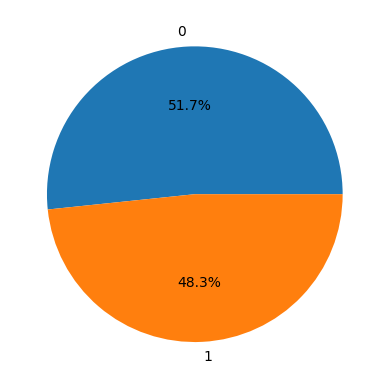

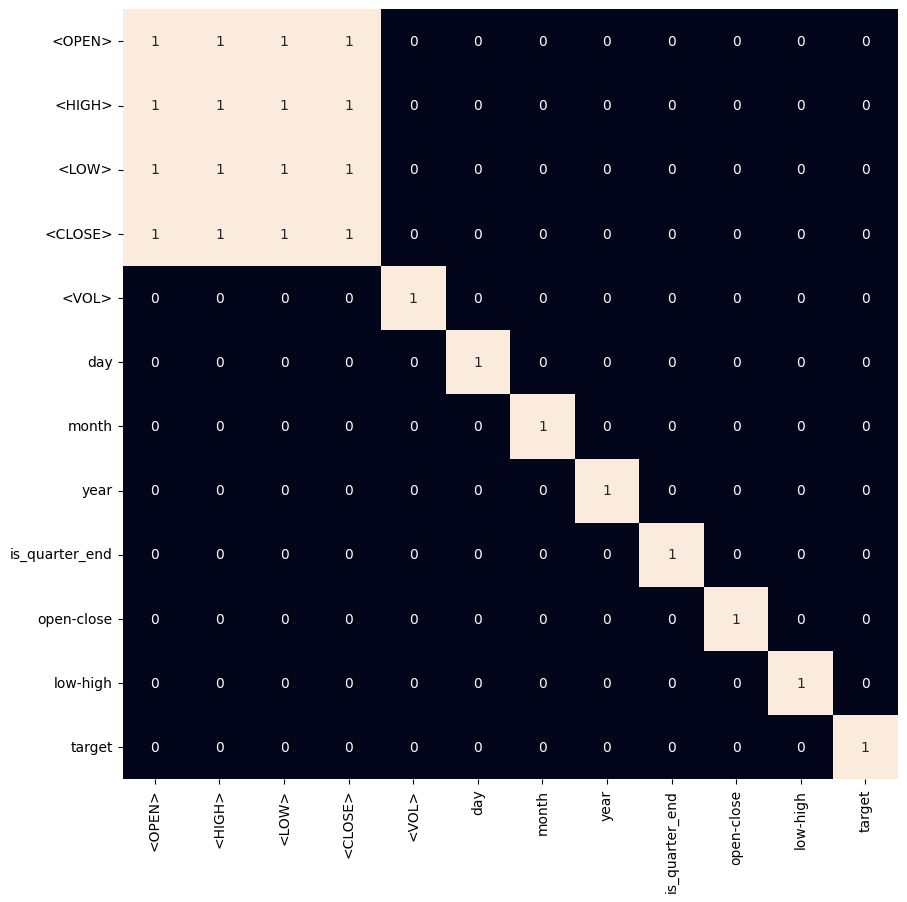

In [ ]:
df = pd.read_csv('/content/sample_data/SBER_210101_250101.csv')
df = df.drop(['<TIME>'], axis=1)


# # график цены закрытия акций
# plt.figure(figsize=(15,5))
# plt.plot(df['<CLOSE>'])
# plt.title('price_in_close', fontsize=15)
# plt.ylabel('Price')
# plt.show()

features = ['<OPEN>', '<HIGH>', '<LOW>', '<CLOSE>', '<VOL>']

# # график распределения данных
# plt.subplots(figsize=(20,10))
# for i, col in enumerate(features):
#   plt.subplot(2,3,i+1)
#   sb.distplot(df[col])
# plt.show()
#
# # диограммы размаха
# plt.subplots(figsize=(20,10))
# for i, col in enumerate(features):
#   plt.subplot(2,3,i+1)
#   sb.boxplot(df[col])
# plt.show()

# # лишние данные не помешают
date = df['<DATE>']
df['day'] = [int(str(i)[4:]) for i in date]
df['month'] = [int(str(i)[2:4]) for i in date]
df['year'] = [int(str(i)[:2]) for i in date]

# # распределение на квартал
df['is_quarter_end'] = np.where(df['month']%3==0,1,0)

# # посмотрим гистрограмму
# data_grouped = df.drop('<DATE>', axis=1).groupby('year').mean()
# plt.subplots(figsize=(20,10))
# for i, col in enumerate(['<OPEN>', '<HIGH>', '<LOW>', '<CLOSE>']):
#   plt.subplot(2,2,i+1)
#   data_grouped[col].plot.bar()
# plt.show()

# сгруппирируем данные для анализа
print(df.drop(['<DATE>'], axis=1).groupby('is_quarter_end').mean())

# еще пару столбцов, которые могут быть полезными
df['open-close']  = df['<OPEN>'] - df['<CLOSE>']
df['low-high']  = df['<LOW>'] - df['<HIGH>']

# добавим столбец для сигнала о покупке
df['target'] = np.where(df['<CLOSE>'].shift(-1) > df['<CLOSE>'], 1, 0)

# посмотрим на сбалансированность, с помощью круговой диограммы
plt.pie(df['target'].value_counts().values, labels=[0, 1], autopct='%1.1f%%')
plt.show()

# посмотрим на корреляцию данных исходных данных, и на данные которые были выведены после анализа
plt.figure(figsize=(10, 10))
sb.heatmap(df.drop('<DATE>', axis=1).corr() > 0.9, annot=True, cbar=False)
plt.show()

# все хорошо, данные готовы для создания модели
# print(df)

## Обучение модели

Обучение модели Random Forest и оценка модели на тестовых данных, и визуализация результатов

(899, 3) (100, 3)


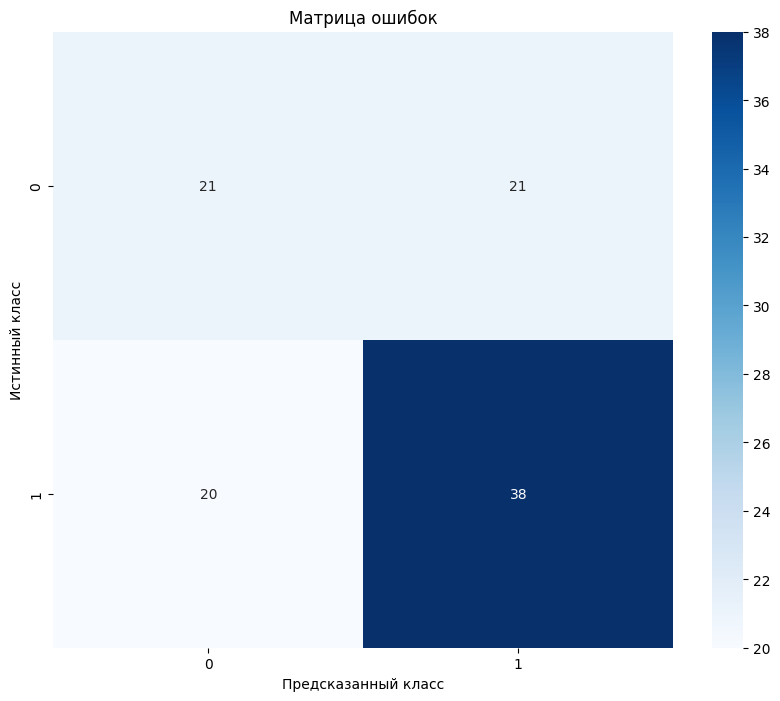

Точность модели: 59.00%

Отчет о классификации:
              precision    recall  f1-score   support

           0       0.51      0.50      0.51        42
           1       0.64      0.66      0.65        58

    accuracy                           0.59       100
   macro avg       0.58      0.58      0.58       100
weighted avg       0.59      0.59      0.59       100



In [ ]:
features = df[['open-close', 'low-high', 'is_quarter_end']]
target = df['target']

# нормализуем данные, для стабилного и быстрого обучения
scaler = StandardScaler()
features = scaler.fit_transform(features)

# разделим данные на две части в соотношении 90/10, можно было и 80/20, но данных не так много
X_train, X_valid, Y_train, Y_valid = train_test_split(
    features, target, test_size=0.1, random_state=2022)
print(X_train.shape, X_valid.shape)

# обучение модели Random Forest
model = RandomForestClassifier(n_estimators=100, n_jobs=1, random_state=2022)
model.fit(X_train, Y_train)

# оценка модели на тестовых данных
y_pred = model.predict(X_valid)
accuracy = metrics.accuracy_score(Y_valid, y_pred)
conf_matrix = metrics.confusion_matrix(Y_valid, y_pred)
report = metrics.classification_report(Y_valid, y_pred)

# визуализация результатов
# график матрицы ошибок
plt.figure(figsize=(10, 8))
sb.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.title('Матрица ошибок')
plt.xlabel('Предсказанный класс')
plt.ylabel('Истинный класс')
plt.show()

# вывод отчета о классификации
print(f'Точность модели: {accuracy:.2%}')
print('\nОтчет о классификации:')
print(report)


###**Анализ работы классификации и регрессии с использованием библиотеки для машинного обучения Scikit-learn (Random Forest):**
**Преимущества:**

  - Быстрое обучение

  - Меньше вычислительных ресурсов

  - Хорошо работает на небольших датасетах

  - Проще в реализации и настройке

**Недостатки:**

  - Ниже точность на задачах компьютерного зрения

  - Теряется пространственная информация при преобразовании изображений в плоские массивы

  - Хуже масштабируется на сложные задачи распознавания

Выбор библиотеки для машинного обучения обычно зависит от:
1. Размера датасета
2. Доступных вычислительных ресурсов
3. Требуемой точности
4. Временных ограничений на обучение
5. Необходимости дальнейшего масштабирования

Точность модели: 59%

Поэксперементировав с разными алгаритмами, такими как: Linear Regression, SVM и XGBoost, выявил что Random Forest выдал наибольщую точность.